210803 - Korea Univ. Machine Learning Mini Project

In [37]:
# 데이터 전처리 패키지
import numpy as np
import pandas as pd

# 기계학습 모델 구축 및 평가 패키지
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler,MinMaxScaler, MaxAbsScaler,RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import statsmodels.api as sm
from statsmodels.formula.api import ols
from collections import Counter

# 경고 숨기기
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.linear_model import LinearRegression

# MAPE def.
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [38]:
# 데이터 불러오기
data = pd.read_csv("C:/py_workspace/korea_py/prj_st/pt_train_dt.csv")

## Data 탐색 및 전처리

In [39]:
data.head(3)

,lot_id,wf,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_395,x_396,x_397,x_398,x_399,x_400,y_1,y_2,y_3,split
0,TDRM795W,9,1.473766,85.908215,249.959409,47.834938,856.046648,2500.0,0.495354,0.565273,...,64.0,64.0,64.0,64.0,64.0,64.0,56.55,58.9400,57.5425,train
1,TDRM129W,3,0.023678,99.979704,249.959409,0.270607,1001.481572,2500.0,0.000000,0.000000,...,55.0,55.0,55.0,55.0,55.0,55.0,57.68,59.7750,58.2325,train
2,TDRLY92W,11,0.007380,88.220968,249.959409,0.000000,882.352941,2500.0,0.366233,0.470358,...,75.0,75.0,75.0,75.0,75.0,75.0,54.67,58.4675,56.1875,train


In [40]:
d_columns = data.columns[1:402]

In [41]:
for col in d_columns:
    data[col] = data[col].fillna(data[col].median())

In [42]:
X = data.drop(['lot_id','split','y_1','y_2','y_3'], axis=1)
Y = data[['y_1','y_2','y_3']]

In [43]:
# 학습 : 검증 : 테스트 = 6 : 3 : 1 데이터 분리
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.4, random_state=2021)
X_vaild, X_test, Y_valid, Y_test = train_test_split(X_valid, Y_valid, test_size=0.25, random_state=2021)

In [35]:
# Outlier 처리 예정




# Scaling

### Robust Scaler

In [9]:
Robust_scaler = RobustScaler()
Robust_scaler.fit(X_train)
X_train_RB = Robust_scaler.transform(X_train)
X_test_RB = Robust_scaler.transform(X_test)

In [33]:
pd.DataFrame(X_train_RB).describe()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
count,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,...,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000
mean,0.001492,2.625928,0.031698,2.845909,12.688144,0.102261,23.116288,0.553783,0.609122,0.629804,...,0.008503,0.001911,-0.005953,-0.017824,-0.015377,-0.012907,-0.011721,-0.008181,0.003867,-0.003472
std,0.599701,5.248584,0.923744,39.745560,26.918238,0.872809,326.051783,1.752147,1.944915,7.383165,...,0.580341,0.591548,0.589737,0.607561,0.608419,0.609235,0.618814,0.610115,0.597602,0.607461
min,-1.000000,-0.529577,-7.339413,-8.927122,-3.081212,-7.371038,-89.314708,0.000000,0.000000,-2.644425,...,-0.972222,-1.142857,-1.078114,-1.147059,-1.147059,-1.147059,-1.164179,-1.147059,-1.122302,-1.157895
25%,-0.500000,-0.038476,-0.469052,0.000000,-0.060621,-0.465606,0.000000,0.000000,0.000000,-0.404459,...,-0.500000,-0.485714,-0.508931,-0.529412,-0.529412,-0.529412,-0.507463,-0.500000,-0.489209,-0.491228
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.961524,0.530948,0.000000,0.939379,0.534394,0.000000,1.000000,1.000000,0.595541,...,0.500000,0.514286,0.491069,0.470588,0.470588,0.470588,0.492537,0.500000,0.510791,0.508772
max,1.000000,74.392623,37.850770,549.040591,172.165012,32.324194,4502.185185,34.896680,22.015448,102.315020,...,1.777778,1.685714,1.751131,1.764706,1.764706,1.764706,1.791045,1.764706,1.726619,1.736842


### MaxAbs Scaler

In [10]:
MA_scaler = MaxAbsScaler()
MA_scaler.fit(X_train)
X_train_MA = MA_scaler.transform(X_train)
X_test_MA = MA_scaler.transform(X_test)

In [34]:
pd.DataFrame(X_train_MA).describe()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
count,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,...,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000,88100.000000
mean,0.520716,0.035907,0.174700,0.316402,0.074195,0.201174,0.360333,0.015869,0.027668,0.503227,...,0.363061,0.410669,0.385167,0.393940,0.394772,0.395612,0.396074,0.397218,0.401344,0.404813
std,0.287856,0.070508,0.020158,0.049744,0.156267,0.021638,0.046564,0.050210,0.088343,0.036070,...,0.208923,0.207042,0.206359,0.206571,0.206862,0.207140,0.207303,0.207439,0.207667,0.207752
min,0.040000,-0.006483,0.013846,0.301667,-0.017350,0.015901,0.344276,0.000000,0.000000,0.487231,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.280000,0.000114,0.163773,0.312840,0.000186,0.187096,0.357031,0.000000,0.000000,0.498174,...,0.180000,0.240000,0.209167,0.220000,0.220000,0.220000,0.230000,0.230000,0.230000,0.238000
50%,0.520000,0.000631,0.174009,0.312840,0.000537,0.198639,0.357031,0.000000,0.000000,0.500150,...,0.360000,0.410000,0.387250,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.406000
75%,0.760000,0.013548,0.185595,0.312840,0.005991,0.211888,0.357031,0.028656,0.045423,0.503059,...,0.540000,0.590000,0.559083,0.560000,0.560000,0.560000,0.565000,0.570000,0.577500,0.580000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modeling

* Linear Regression

In [20]:
# 선형 회귀 모델 학습 - Standard Scaler
reg_st = LinearRegression().fit(X_train_RB, Y_train)
reg_st.score(X_train_RB, Y_train)
reg_st.coef_
reg_st.intercept_
reg_st.predict(X_test_RB)

array([[58.00023015, 59.06442536, 58.31067202],
       [56.4680694 , 58.66165   , 57.37446258],
       [56.87575979, 59.61103799, 57.93275757],
       ...,
       [56.27004451, 58.59186511, 57.32079814],
       [57.24473954, 59.30570322, 58.00161303],
       [57.50780427, 59.46605722, 58.28044528]])

In [21]:
reg_ma = LinearRegression().fit(X_train_MA, Y_train)
reg_ma.score(X_train_MA, Y_train)
reg_ma.coef_
reg_ma.intercept_
reg_ma.predict(X_test_MA)

array([[58.00023015, 59.06442536, 58.31067202],
       [56.4680694 , 58.66165   , 57.37446258],
       [56.87575979, 59.61103799, 57.93275757],
       ...,
       [56.27004451, 58.59186511, 57.32079814],
       [57.24473954, 59.30570322, 58.00161303],
       [57.50780427, 59.46605722, 58.28044528]])

In [22]:
reg_st.score(X_train_RB, Y_train)

0.17471356431303753

In [23]:
reg_ma.score(X_train_MA, Y_train)

0.174713564313037

In [24]:
train_y_pred = reg_st.predict(X_train_RB)

In [25]:
train_y_pred_ma = reg_ma.predict(X_train_MA)

In [26]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [27]:
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred)))

Training MSE : 0.851
Training RMSE : 0.923
Training MAE : 0.685
Training MAPE : 1.185
Training R2 : 0.175


In [28]:
print("Training MSE : {:.3f}".format(mean_squared_error(Y_train, train_y_pred_ma)))
print("Training RMSE : {:.3f}".format(np.sqrt(mean_squared_error(Y_train, train_y_pred_ma))))
print("Training MAE : {:.3f}".format(mean_absolute_error(Y_train, train_y_pred_ma)))
print("Training MAPE : {:.3f}".format(mean_absolute_percentage_error(Y_train, train_y_pred_ma)))
print("Training R2 : {:.3f}".format(r2_score(Y_train, train_y_pred_ma)))

Training MSE : 0.851
Training RMSE : 0.923
Training MAE : 0.685
Training MAPE : 1.185
Training R2 : 0.175


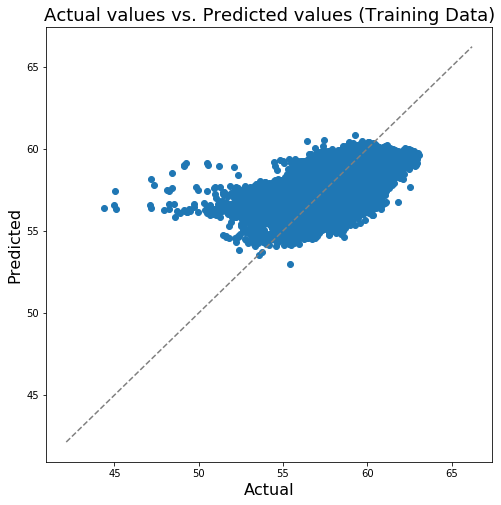

In [29]:
fig_values = np.concatenate([Y_train.squeeze(), train_y_pred.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Training Data)', size=18)
plt.scatter(Y_train, train_y_pred)
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.show()

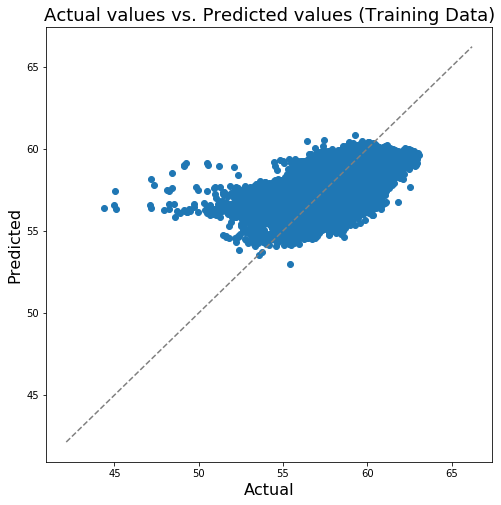

In [30]:
fig_values = np.concatenate([Y_train.squeeze(), train_y_pred_ma.squeeze()])
vmin = np.min(fig_values) * 0.95
vmax = np.max(fig_values) * 1.05

plt.figure(figsize=(8, 8))
plt.title('Actual values vs. Predicted values (Training Data)', size=18)
plt.scatter(Y_train, train_y_pred_ma)
plt.plot([vmin, vmax], [vmin, vmax], color='grey', linestyle='dashed')
plt.xlabel('Actual', size=16)
plt.ylabel('Predicted', size=16)
plt.show()

* Multiple Regression

* Decision tree regression

* Random forest trees

* Gradient boosted trees

## 테스트 데이터셋 성능 평가

In [ ]:
# 학습 데이터 실제 값
test_true = test_data['MEDV']

# 학습 데이터 예측 값
test_pred = lm_trained.predict(test_data.drop(['MEDV'], axis=1))

MSE_value = mean_squared_error(test_true, test_pred)
RMSE_value = np.sqrt(mean_squared_error(test_true, test_pred))
MAE_value = mean_absolute_error(test_true, test_pred)
MAPE_value = mean_absolute_percentage_error(test_true, test_pred)
r2_value = r2_score(test_true, test_pred)

print("Testing MSE : {:.3f}".format(MSE_value))
print("Testing RMSE : {:.3f}".format(RMSE_value))
print("Testing MAE : {:.3f}".format(MAE_value))
print("Testing MAPE : {:.3f}".format(MAPE_value))
print("Testing R2 : {:.3f}".format(r2_value))

## 변수 선별

In [ ]:
# 제거할 변수 이름
drop_var = 

# 설정한 변수 제거
train_data_new = train_data.drop(drop_var, axis=1)
test_data_new = test_data.drop(drop_var, axis=1)

- 테스트 데이터 성능 평가

In [ ]:
# 변수가 제거된 데이터로 학습
lm_new = sm.OLS(train_data_new['MEDV'], train_data_new.drop('MEDV', axis=1))
lm_new_trained = lm_new.fit()
display(lm_new_trained.summary())

In [ ]:
# 학습 데이터 실제 값
test_true = test_data_new['MEDV']

# 학습 데이터 예측 값
test_pred = lm_new_trained.predict(test_data_new.drop(['MEDV'], axis=1))

new_MSE_value = mean_squared_error(test_true, test_pred)
new_RMSE_value = np.sqrt(mean_squared_error(test_true, test_pred))
new_MAE_value = mean_absolute_error(test_true, test_pred)
new_MAPE_value = mean_absolute_percentage_error(test_true, test_pred)
new_r2_value = r2_score(test_true, test_pred)

print('Testing MSE: {:.3f} → {:.3f}'.format(MSE_value, new_MSE_value))
print('Testing RMSE: {:.3f} → {:.3f}'.format(RMSE_value, new_RMSE_value))
print('Testing MAE: {:.3f} → {:.3f}'.format(MAE_value, new_MAE_value))
print('Testing MAPE: {:.3f} → {:.3f}'.format(MAPE_value, new_MAPE_value))
print('Testing R2: {:.3f} → {:.3f}'.format(r2_value, new_r2_value))

* 상관계수가 높은 변수 제거하기

In [ ]:
plt.figure(figsize=(10, 9))
sns.heatmap(data.corr(), cmap=sns.color_palette("coolwarm", 10), annot=True)
plt.show()

In [ ]:
# 제거할 변수 이름
drop_var = "TAX"

# 설정한 변수 제거
train_data_new = train_data.drop(drop_var, axis=1)
test_data_new = test_data.drop(drop_var, axis=1)

In [ ]:
# 변수가 제거된 데이터로 학습
lm_new = sm.OLS(train_data_new['MEDV'], train_data_new.drop('MEDV', axis=1))
lm_new_trained = lm_new.fit()

display(lm_new_trained.summary())

In [ ]:
# 학습 데이터 실제 값
test_true = test_data_new['MEDV']

# 학습 데이터 예측 값
test_pred = lm_new_trained.predict(test_data_new.drop(['MEDV'], axis=1))

new_MSE_value = mean_squared_error(test_true, test_pred)
new_RMSE_value = np.sqrt(mean_squared_error(test_true, test_pred))
new_MAE_value = mean_absolute_error(test_true, test_pred)
new_MAPE_value = mean_absolute_percentage_error(test_true, test_pred)
new_r2_value = r2_score(test_true, test_pred)

print('Testing MSE: {:.3f} → {:.3f}'.format(MSE_value, new_MSE_value))
print('Testing RMSE: {:.3f} → {:.3f}'.format(RMSE_value, new_RMSE_value))
print('Testing MAE: {:.3f} → {:.3f}'.format(MAE_value, new_MAE_value))
print('Testing MAPE: {:.3f} → {:.3f}'.format(MAPE_value, new_MAPE_value))
print('Testing R2: {:.3f} → {:.3f}'.format(r2_value, new_r2_value))